<a href="https://colab.research.google.com/github/huseyinmuldur/MachineLearning/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [12]:
# Veri setini oku
data = pd.read_csv('veri-seti.csv', delimiter='\t')

# Giriş özellikleri (X) ve hedef değişken (y) olarak ayır
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nMinMax Normalize Edilmiş Eğitim Verisi:")
print(X_train_scaled)



MinMax Normalize Edilmiş Eğitim Verisi:
[[0.         0.83333333 0.62295082 ... 0.71385991 0.07728437 0.08333333]
 [0.2        0.64646465 0.63934426 ... 0.31445604 0.08112724 0.56666667]
 [0.13333333 0.56060606 0.49180328 ... 0.390462   0.11315115 0.03333333]
 ...
 [0.13333333 0.54545455 0.50819672 ... 0.37555887 0.02134927 0.        ]
 [0.8        0.70707071 0.69672131 ... 0.55737705 0.07087959 0.33333333]
 [0.06666667 0.40909091 0.59016393 ... 0.39642325 0.08753202 0.05      ]]


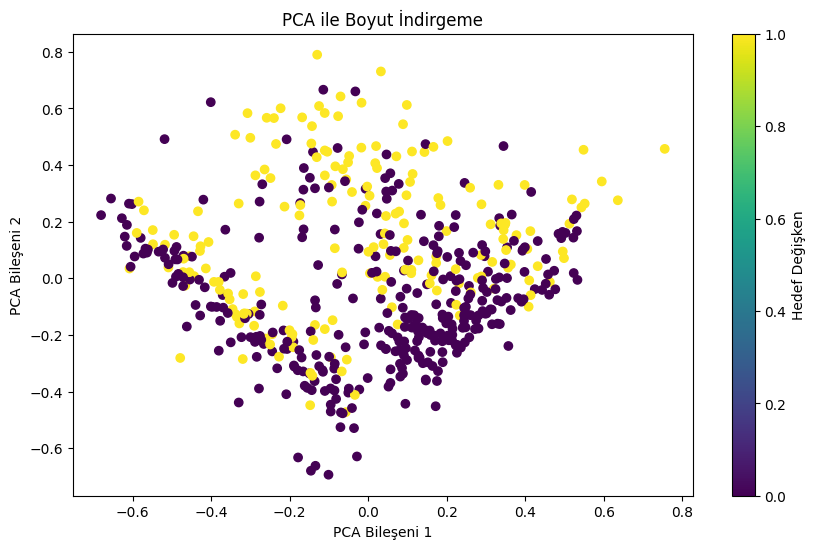

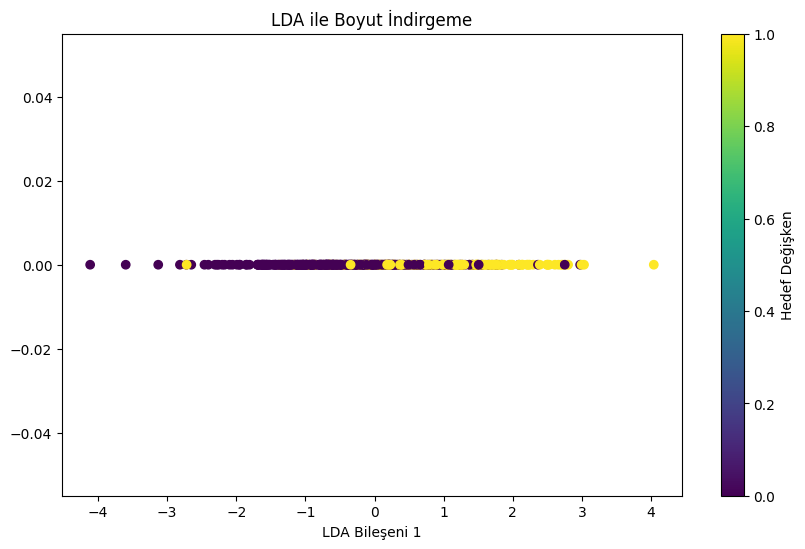

In [13]:

# PCA modelini oluştur ve eğit
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# LDA modelini oluştur ve eğit
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# PCA için 2 bileşenli görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA ile Boyut İndirgeme')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.colorbar(label='Hedef Değişken')
plt.show()

# LDA için 1 bileşenli görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis')
plt.title('LDA ile Boyut İndirgeme')
plt.xlabel('LDA Bileşeni 1')
plt.ylabel('')
plt.colorbar(label='Hedef Değişken')
plt.show()

In [14]:

# Çoklu Doğrusal Regresyon analizi
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_coefficients = linear_reg_model.coef_
print("\nÇoklu Doğrusal Regresyon Katsayıları:")
for i, coef in enumerate(linear_reg_coefficients):
    print(f"Katsayı {i+1}: {coef:.4f}")

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_reg_model.fit(X_train, y_train)
logistic_reg_coefficients = logistic_reg_model.coef_
print("\nMultinominal Lojistik Regresyon Katsayıları:")
for i, coef in enumerate(logistic_reg_coefficients[0]):
    print(f"Katsayı {i+1}: {coef:.4f}")

# Test kümesi için performans metriklerini hesapla
# Çoklu Doğrusal Regresyon için
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

# Multinominal Lojistik Regresyon için
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)

print(f"\nÇoklu Doğrusal Regresyon Test Kümesi MSE: {linear_reg_mse:.4f}")
print(f"Multinominal Lojistik Regresyon Test Kümesi Doğruluk: {logistic_reg_accuracy:.4f}")


Çoklu Doğrusal Regresyon Katsayıları:
Katsayı 1: 0.0217
Katsayı 2: 0.0058
Katsayı 3: -0.0009
Katsayı 4: 0.0009
Katsayı 5: -0.0000
Katsayı 6: 0.0104
Katsayı 7: 0.1594
Katsayı 8: 0.0021

Multinominal Lojistik Regresyon Katsayıları:
Katsayı 1: 0.0603
Katsayı 2: 0.0170
Katsayı 3: -0.0024
Katsayı 4: 0.0022
Katsayı 5: -0.0002
Katsayı 6: 0.0368
Katsayı 7: 0.4745
Katsayı 8: 0.0065

Çoklu Doğrusal Regresyon Test Kümesi MSE: 0.1553
Multinominal Lojistik Regresyon Test Kümesi Doğruluk: 0.7922



Konfüzyon Matrisi:
[[137  14]
 [ 34  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       151
           1       0.77      0.57      0.66        80

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231


Doğruluk: 0.7922077922077922


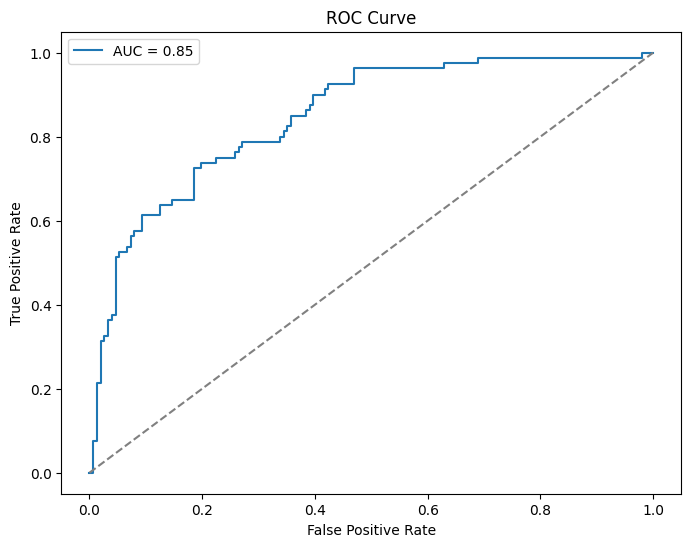

In [17]:


# Konfüzyon matrisini hesapla ve yazdır
conf_matrix = confusion_matrix(y_test, logistic_reg_predictions)
print("\nKonfüzyon Matrisi:")
print(conf_matrix)

# Hassasiyet, özgüllük, doğruluk ve F1 skoru gibi performans metriklerini hesapla
classification_rep = classification_report(y_test, logistic_reg_predictions)
print("\nClassification Report:")
print(classification_rep)

# Doğruluk için
accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("\nDoğruluk:", accuracy)

# ROC eğrisi ve AUC skoru için
y_prob = logistic_reg_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
auc_score = roc_auc_score(y_test, y_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

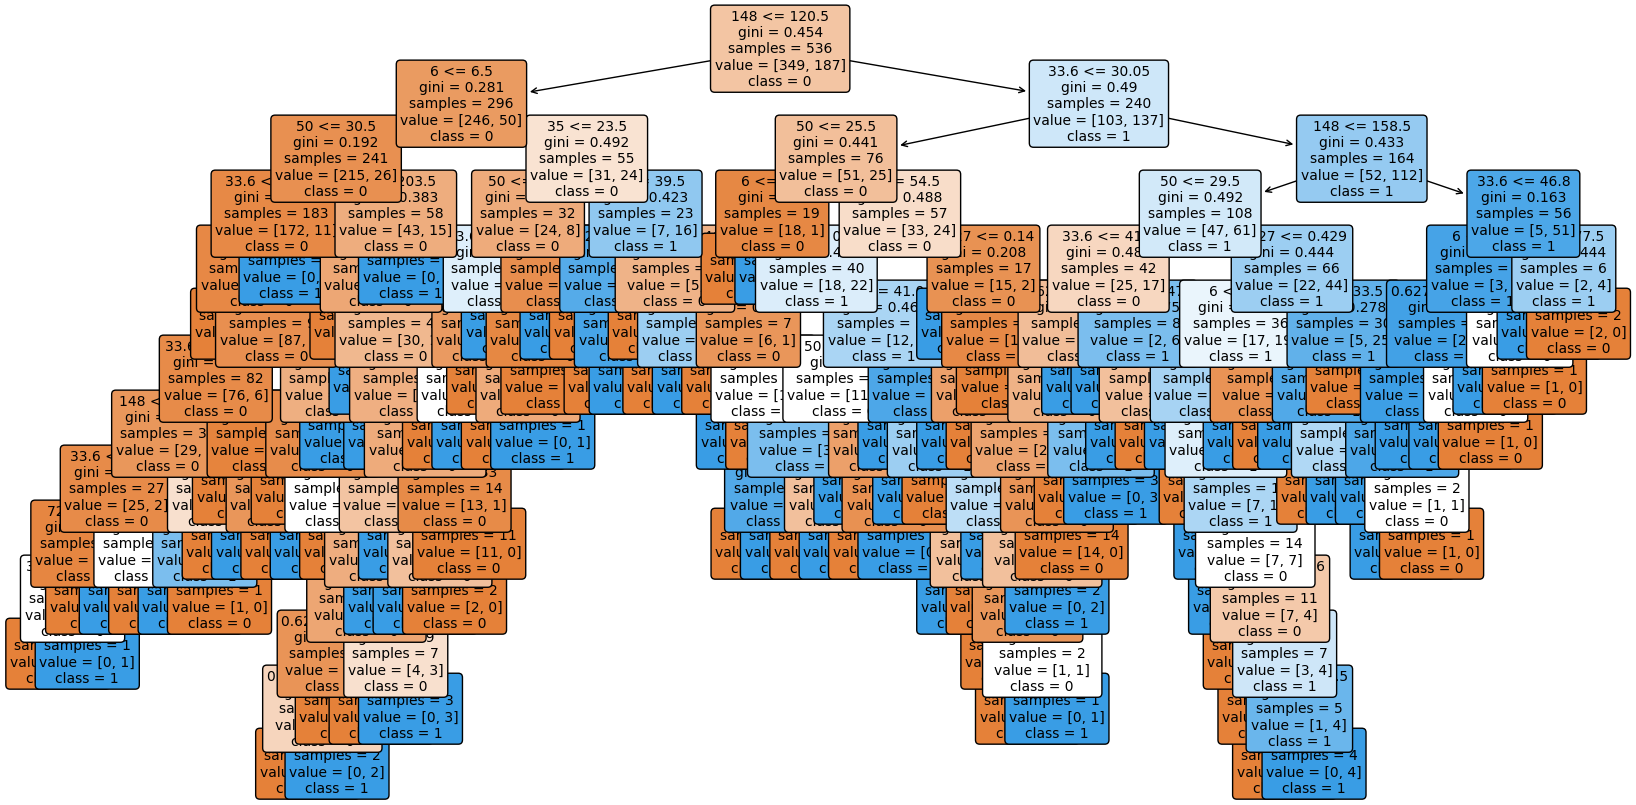

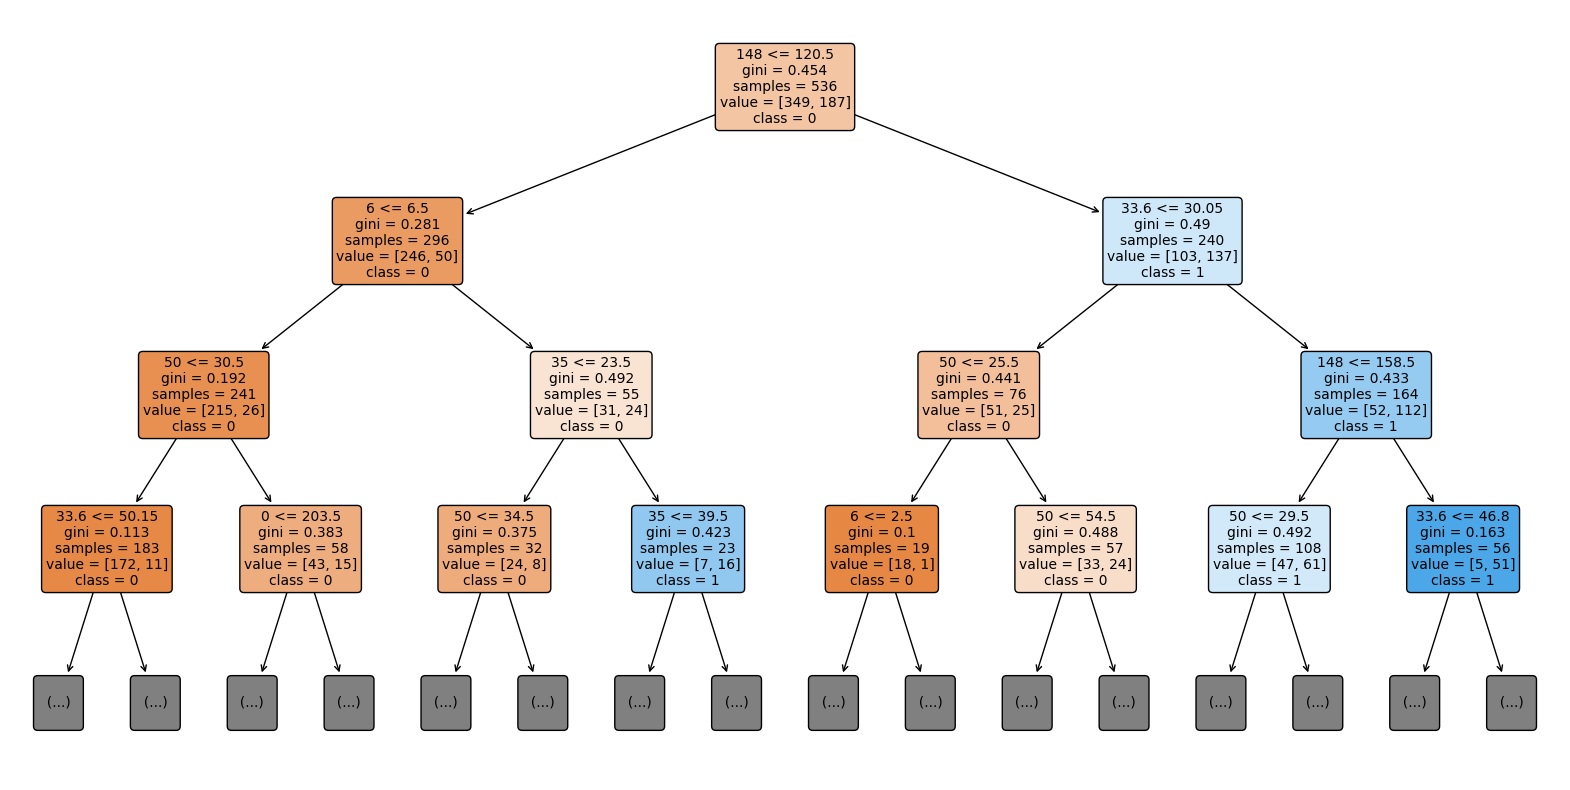


Konfüzyon Matrisi:
[[119  32]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       151
           1       0.61      0.62      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231


Doğruluk: 0.7316017316017316


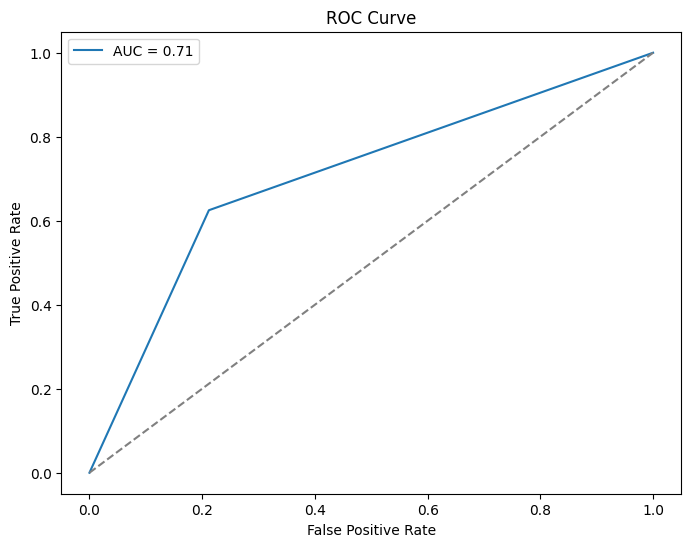

In [18]:



# Karar ağacı sınıflandırıcıyı oluştur ve eğit
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Ağaç yapısını görselleştir
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=y.unique().astype(str), rounded=True, fontsize=10)
plt.show()

# Karar ağacının eğitim verisiyle budanmış halini çiz
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=y.unique().astype(str), rounded=True, fontsize=10, max_depth=3)
plt.show()

# Test verisi üzerinde kestirim yap
y_pred = decision_tree.predict(X_test)

# Konfüzyon matrisini hesapla ve yazdır
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKonfüzyon Matrisi:")
print(conf_matrix)

# Hassasiyet, özgüllük, doğruluk ve F1 skoru gibi performans metriklerini hesapla
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

# Doğruluk için
accuracy = accuracy_score(y_test, y_pred)
print("\nDoğruluk:", accuracy)

# ROC eğrisi ve AUC skoru için
y_prob = decision_tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
auc_score = roc_auc_score(y_test, y_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

